### Logistic Regression

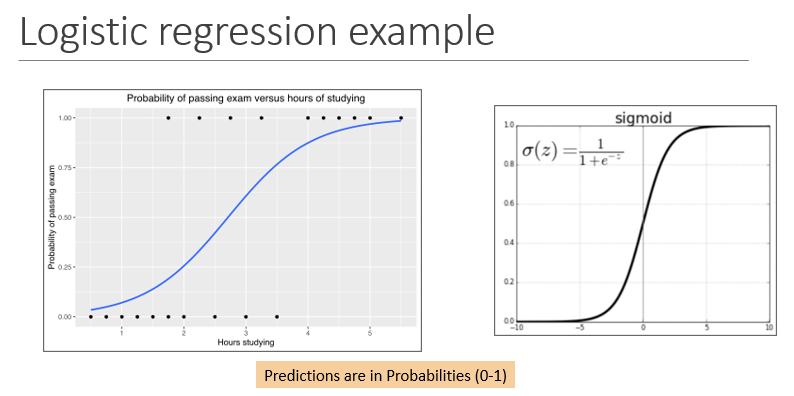

$ z = Bo + B1*x1 + B2*x2 +.....+Bn*xn $ 

### Step 1 - Data Ingestion

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 - Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1)

### Step 3 - Seperate X and Y(species)

In [5]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [8]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Step 4 - Apply preprocessing on X

In [9]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [14]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### Step 5 - Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.35, random_state=46)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
123,0.553333,-0.822570,0.649083,0.790671
96,-0.173674,-0.362176,0.251221,0.132510
17,-0.900681,1.019004,-1.340227,-1.183812
29,-1.385353,0.328414,-1.226552,-1.315444
45,-1.264185,-0.131979,-1.340227,-1.183812


In [17]:
ytrain.head()

,species
123,virginica
96,versicolor
17,setosa
29,setosa
45,setosa


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
4,-1.021849,1.249201,-1.340227,-1.315444
54,0.795669,-0.592373,0.478571,0.395774
106,-1.143017,-1.282963,0.421734,0.659038
8,-1.748856,-0.362176,-1.340227,-1.315444
24,-1.264185,0.788808,-1.056039,-1.315444


In [19]:
ytest.head()

,species
4,setosa
54,versicolor
106,virginica
8,setosa
24,setosa


In [20]:
xtrain.shape

(97, 4)

In [22]:
xtest.shape

(53, 4)

### Step 6 - Model Building

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
model.intercept_

array([-0.28387682,  1.77071   , -1.48683318])

In [26]:
model.coef_

array([[-0.98497299,  0.9130834 , -1.73240033, -1.62531971],
       [ 0.30949655, -0.46462116, -0.10035757, -0.76612015],
       [ 0.67547645, -0.44846224,  1.8327579 ,  2.39143986]])

In [27]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

### Step 7 - Model Evaluation

In [28]:
model.score(xtrain, ytrain)

0.9896907216494846

In [29]:
model.score(xtest, ytest)

0.9056603773584906

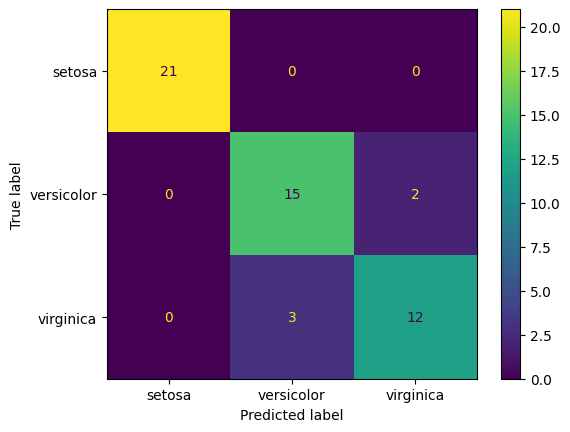

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [31]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [32]:
ytest.head()

,species
4,setosa
54,versicolor
106,virginica
8,setosa
24,setosa


In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.83      0.88      0.86        17
   virginica       0.86      0.80      0.83        15

    accuracy                           0.91        53
   macro avg       0.90      0.89      0.89        53
weighted avg       0.91      0.91      0.91        53



In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Deskt

array([0.95213675, 1.        , 0.9047619 , 1.        , 1.        ])

In [35]:
scores.mean()

np.float64(0.9713797313797314)

### Clearly above model is good because f1_macro > 0.80 in test and in cross validation

### Step 7 - Out of sample prediction

In [36]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [37]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [38]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [39]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [40]:
probs = model.predict_proba(xnew_pre)
probs

array([[2.45030755e-02, 9.16674252e-01, 5.88226721e-02],
       [8.55932201e-05, 3.68986344e-02, 9.63015772e-01],
       [1.36046381e-01, 8.57266801e-01, 6.68681861e-03],
       [6.98506247e-01, 3.01398251e-01, 9.55024270e-05],
       [4.59928240e-03, 3.22271521e-01, 6.73129197e-01],
       [9.64362672e-01, 3.56360648e-02, 1.26301895e-06],
       [1.56646345e-01, 8.07710335e-01, 3.56433196e-02],
       [5.06692043e-04, 1.25171989e-01, 8.74321319e-01],
       [9.83052277e-01, 1.69470328e-02, 6.89861447e-07],
       [9.08067551e-01, 9.17173495e-02, 2.15099218e-04],
       [2.42950288e-02, 8.99540965e-01, 7.61640066e-02],
       [3.44015678e-02, 9.53005364e-01, 1.25930679e-02],
       [1.69728121e-06, 8.90965333e-03, 9.91088649e-01],
       [3.92027950e-03, 5.68032115e-01, 4.28047605e-01],
       [9.60668705e-04, 6.46327017e-01, 3.52712314e-01]])

In [41]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
xnew["species_pred"] = preds
xnew[model.classes_] = probs
xnew = xnew.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0245,0.9167,0.0588
1,6.9,3.1,5.1,2.3,virginica,0.0001,0.0369,0.9630
2,5.1,2.5,3.0,1.1,versicolor,0.1360,0.8573,0.0067
3,4.4,2.9,NaN,0.2,setosa,0.6985,0.3014,0.0001
4,5.9,3.0,5.1,1.8,virginica,0.0046,0.3223,0.6731
5,5.5,3.5,1.3,0.2,setosa,0.9644,0.0356,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1566,0.8077,0.0356
7,6.5,3.0,5.2,2.0,virginica,0.0005,0.1252,0.8743
8,5.3,3.7,1.5,0.2,setosa,0.9831,0.0169,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9081,0.0917,0.0002


In [44]:
xnew["species_pred"].value_counts()

species_pred
versicolor    7
virginica     4
setosa        4
Name: count, dtype: int64

In [45]:
xnew.to_csv("Result.csv", index=False)

### Save the preprocessor and model object

In [46]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
model

LogisticRegression()

In [50]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [54]:
joblib.dump(model, "model.joblib")

['model.joblib']

### Loading the model

In [56]:
p = joblib.load("pre.joblib")
p

LogisticRegression()

In [55]:
m = joblib.load("model.joblib")
m

LogisticRegression()